In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from pathlib import Path

PATH = Path.home() / "Desktop" / "nhs-hes-analysis" / "data" / "raw" / "hosp-epis-stat-admi-demog-2024-25-tab.xlsx"
PATH.exists(), PATH


(True,
 PosixPath('/Users/punarnava/Desktop/nhs-hes-analysis/data/raw/hosp-epis-stat-admi-demog-2024-25-tab.xlsx'))

## Introduction

Hospital Episode Statistics (HES) is a national administrative database that records information on hospital admissions, outpatient appointments, and emergency department attendances within National Health Service (NHS) hospitals in England. HES data are commonly used in health services research to examine patterns of healthcare use and to support planning and policy evaluation.

Length of hospital stay is an important measure of healthcare utilisation, as it reflects both patient complexity and the demand placed on hospital services. Differences in length of stay across population groups may be influenced by factors such as age, admission type, and underlying health needs. Exploring variation in length of stay at a population level can therefore provide useful insight into how hospital services are used across different groups.

Previous research has shown that ethnicity is associated with differences in health outcomes and patterns of hospital admission. However, interpreting these differences requires caution, particularly when using administrative data, as they may reflect broader demographic and structural factors rather than direct causal effects. Analysing aggregated data allows for the description of population-level patterns while maintaining patient anonymity.

The aim of this study was to use publicly available aggregate Hospital Episode Statistics Admitted Patient Care data to describe variation in hospital length of stay across ethnic categories and to explore how admission type is associated with length of stay at a population level.


In [2]:
import pandas as pd
df = pd.read_excel(PATH, sheet_name="Ethnic Category", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Ethnic Category, 2024-25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,This table groups episodes by the ethnicity of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd

raw = pd.read_excel(
    PATH,
    sheet_name="Ethnic Category",
    header=None
)

raw.head(15)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Ethnic Category, 2024-25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,This table groups episodes by the ethnicity of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Copyright © 2025, NHS England.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Activity in English NHS Hospitals and English ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,For more information on data quality please se...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zero bed day cases §,NaN,NaN


## Methods
This study used a retrospective observational design using secondary aggregate healthcare data from NHS Hospital Episode Statistics (HES) published by NHS England. Publicly available Admitted Patient Care activity tables were imported into Python, cleaned, and summarised across ethnic categories. An emergency admission proportion was derived as the share of emergency admissions among total emergency and elective admissions. Descriptive statistics and visualisations were used to explore variation in length of stay and admission mix across groups.


In [4]:
header_row = raw.index[
    raw.iloc[:, 0]
    .astype(str)
    .str.strip()
    .eq("Ethnic Category")
][0]

header_row


np.int64(10)

In [5]:
df = pd.read_excel(
    PATH,
    sheet_name="Ethnic Category",
    header=header_row
)

# Drop empty rows & columns
df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")

df.head()


,Ethnic Category,Unnamed: 1,Finished consultant episodes,Finished Admission Episodes,Male \n(FCE),Female \n(FCE),Gender Unknown \n(FCE),Emergency \n(FAE),Waiting list \n(FAE),Planned (FAE),...,Age 70-74 \n(FCE),Age 75-79 \n(FCE),Age 80-84 \n(FCE),Age 85-89 \n(FCE),Age 90+ \n(FCE),Day case \n(FCE),FCE bed days,Emergency \n(FAE).1,Elective\n(FAE),Other\n(FAE)
1,Total,NaN,22555615.0,18468856.0,10125067.0,12282856.0,147692.0,6614976.0,7322118.0,2638492.0,...,1913594.0,2276417.0,1803549.0,1322476.0,809545.0,8661338.0,48360197.0,2430157.0,220081.0,648436.0
2,A,British (White),15215764.0,12219454.0,6877477.0,8234764.0,103523.0,4600731.0,4770165.0,1815501.0,...,1414851.0,1771303.0,1418036.0,1053042.0,656385.0,5743696.0,34045068.0,1613480.0,142041.0,367508.0
3,B,Irish (White),149772.0,115526.0,67679.0,81552.0,541.0,42243.0,47733.0,15941.0,...,16664.0,19879.0,19337.0,14596.0,7363.0,55312.0,375933.0,12680.0,1235.0,3699.0
4,C,Any other White background,1058107.0,893682.0,437357.0,615282.0,5468.0,309882.0,320295.0,97413.0,...,54581.0,57895.0,46029.0,34784.0,23650.0,358777.0,2170102.0,128965.0,10090.0,54279.0
5,D,White and Black Caribbean (Mixed),78452.0,68952.0,29222.0,48988.0,242.0,24595.0,19727.0,6723.0,...,1645.0,1163.0,1354.0,1116.0,661.0,22182.0,171826.0,10980.0,881.0,6327.0


In [6]:
df.head()


,Ethnic Category,Unnamed: 1,Finished consultant episodes,Finished Admission Episodes,Male \n(FCE),Female \n(FCE),Gender Unknown \n(FCE),Emergency \n(FAE),Waiting list \n(FAE),Planned (FAE),...,Age 70-74 \n(FCE),Age 75-79 \n(FCE),Age 80-84 \n(FCE),Age 85-89 \n(FCE),Age 90+ \n(FCE),Day case \n(FCE),FCE bed days,Emergency \n(FAE).1,Elective\n(FAE),Other\n(FAE)
1,Total,NaN,22555615.0,18468856.0,10125067.0,12282856.0,147692.0,6614976.0,7322118.0,2638492.0,...,1913594.0,2276417.0,1803549.0,1322476.0,809545.0,8661338.0,48360197.0,2430157.0,220081.0,648436.0
2,A,British (White),15215764.0,12219454.0,6877477.0,8234764.0,103523.0,4600731.0,4770165.0,1815501.0,...,1414851.0,1771303.0,1418036.0,1053042.0,656385.0,5743696.0,34045068.0,1613480.0,142041.0,367508.0
3,B,Irish (White),149772.0,115526.0,67679.0,81552.0,541.0,42243.0,47733.0,15941.0,...,16664.0,19879.0,19337.0,14596.0,7363.0,55312.0,375933.0,12680.0,1235.0,3699.0
4,C,Any other White background,1058107.0,893682.0,437357.0,615282.0,5468.0,309882.0,320295.0,97413.0,...,54581.0,57895.0,46029.0,34784.0,23650.0,358777.0,2170102.0,128965.0,10090.0,54279.0
5,D,White and Black Caribbean (Mixed),78452.0,68952.0,29222.0,48988.0,242.0,24595.0,19727.0,6723.0,...,1645.0,1163.0,1354.0,1116.0,661.0,22182.0,171826.0,10980.0,881.0,6327.0


In [8]:
# Helper: find a single column by keyword(s)
def find_one(keyword, must=None):
    cols = [c for c in df.columns if keyword.lower() in c.lower()]
    if must:
        cols = [c for c in cols if must.lower() in c.lower()]
    if not cols:
        raise ValueError(f"Could not find column containing: {keyword} (must={must}).")
    return cols[0]

ethnic_code_col = find_one("Ethnic Category")     # A, B, C...
ethnic_name_col = "Unnamed: 1"                   # British (White), etc.

emerg_col  = find_one("Emergency", "FAE")         # picks Emergency (FAE)
elect_col  = find_one("Elective", "FAE")          # picks Elective (FAE)
mean_los   = find_one("Mean length of stay")
median_los = find_one("Median length of stay")
mean_age   = find_one("Mean age")

# Build analysis dataframe
df2 = df[[ethnic_code_col, ethnic_name_col, emerg_col, elect_col, mean_los, median_los, mean_age]].copy()
df2.columns = [
    "ethnic_code",
    "ethnic_name",
    "emergency_admissions",
    "elective_admissions",
    "mean_los",
    "median_los",
    "mean_age"
]

# Clean text + remove Total/blank rows
df2["ethnic_name"] = df2["ethnic_name"].astype(str).str.strip()
df2 = df2[~df2["ethnic_name"].str.lower().isin(["nan", "total"])]
df2 = df2[df2["ethnic_code"].astype(str).str.strip().ne("Total")]

df2.head()


,ethnic_code,ethnic_name,emergency_admissions,elective_admissions,mean_los,median_los,mean_age
2,A,British (White),4600731.0,142041.0,5.012125,1.0,58.684379
3,B,Irish (White),42243.0,1235.0,6.074455,2.0,64.255238
4,C,Any other White background,309882.0,10090.0,3.831282,1.0,45.448140
5,D,White and Black Caribbean (Mixed),24595.0,881.0,3.356395,1.0,31.205713
6,E,White and Black African (Mixed),13855.0,528.0,3.129489,1.0,30.435234


In [9]:
# Emergency proportion among emergency + elective
df2["emergency_proportion"] = df2["emergency_admissions"] / (
    df2["emergency_admissions"] + df2["elective_admissions"]
)

# Sort by mean LOS to inspect
df2.sort_values("mean_los", ascending=False).head(10)


,ethnic_code,ethnic_name,emergency_admissions,elective_admissions,mean_los,median_los,mean_age,emergency_proportion
3,B,Irish (White),42243.0,1235.0,6.074455,2.0,64.255238,0.971595
13,M,Caribbean (Black or Black British),60092.0,1861.0,6.056014,1.0,54.536920,0.969961
2,A,British (White),4600731.0,142041.0,5.012125,1.0,58.684379,0.970051
15,P,Any other Black background,51614.0,1601.0,4.813600,1.0,42.781032,0.969914
18,Z,Not stated,457175.0,22643.0,4.767854,1.0,57.324999,0.952809
19,99/X,Not known,239877.0,12095.0,4.469668,1.0,54.454767,0.951999
8,G,Any other Mixed background,43892.0,1392.0,4.283453,1.0,31.169999,0.969261
14,N,African (Black or Black British),110630.0,3522.0,3.985895,1.0,35.481400,0.969146
17,S,Any other ethnic group,157597.0,5191.0,3.872993,1.0,43.954630,0.968112
4,C,Any other White background,309882.0,10090.0,3.831282,1.0,45.448140,0.968466


In [10]:
summary = df2[["mean_los", "median_los", "mean_age", "emergency_proportion"]].describe().T
summary


,count,mean,std,min,25%,50%,75%,max
mean_los,18.0,4.066634,0.975864,2.844172,3.343624,3.852137,4.693307,6.074455
median_los,18.0,1.055556,0.235702,1.000000,1.000000,1.000000,1.000000,2.000000
mean_age,18.0,43.647430,10.892617,28.763836,35.138204,43.367831,53.064878,64.255238
emergency_proportion,18.0,0.965848,0.005850,0.951999,0.964633,0.968721,0.969363,0.971595


In [15]:
from pathlib import Path

# Create outputs/figures if it doesn't exist
Path("../outputs/figures").mkdir(parents=True, exist_ok=True)


## Results

Figure 1 shows the mean length of hospital stay across the top 15 ethnic categories ranked by average length of stay. Mean length of stay varied across groups, ranging from approximately three to over six days. The longest average stays were observed among Irish (White) and Caribbean (Black or Black British) groups, while several Asian and mixed ethnic categories showed comparatively shorter mean stays. British (White) patients demonstrated a mid-to-higher range mean length of stay relative to other groups included in the top 15.

Across most ethnic categories, median length of stay remained low (generally one day), indicating that mean length of stay was influenced by a smaller proportion of longer admissions rather than typical hospital episodes. Differences in mean age across ethnic categories were also observed and may partially contribute to variation in average length of stay.

Figure 2 illustrates the relationship between the proportion of emergency admissions and mean length of stay. Emergency admissions accounted for a very high proportion of total admissions across all ethnic categories, typically exceeding 95%. A positive association was observed between the proportion of emergency admissions and mean length of stay, with groups experiencing a higher reliance on emergency care tending to show longer average hospital stays. While the relationship was modest and based on a small number of aggregated observations, the overall trend suggests that admission type may play an important role in shaping population-level patterns of hospital utilisation.


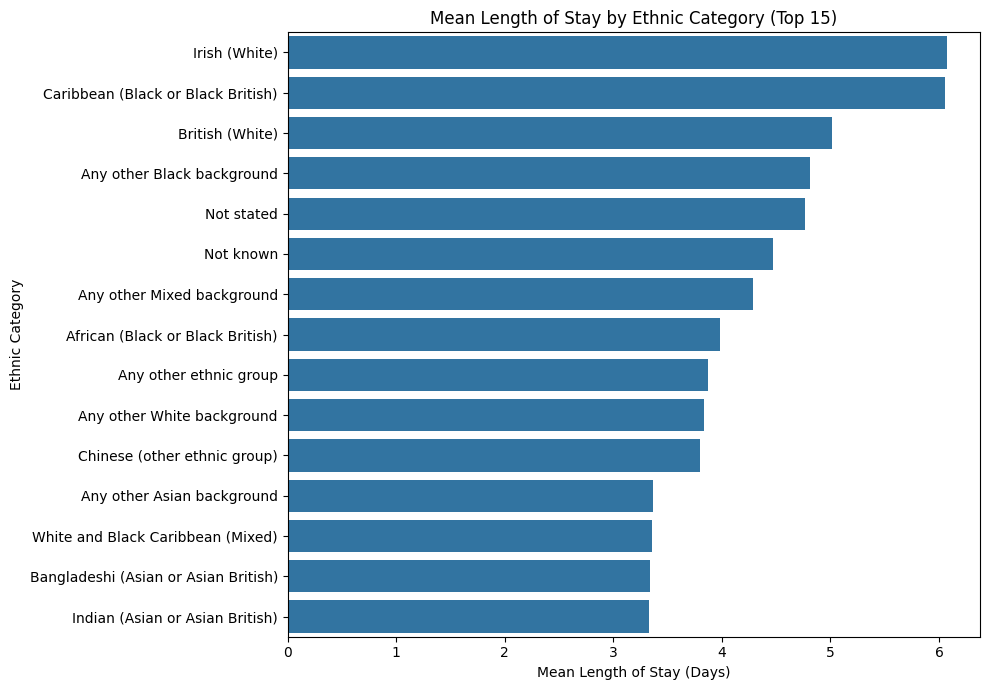

In [16]:
top = df2.sort_values("mean_los", ascending=False).head(15)

plt.figure(figsize=(10, 7))
sns.barplot(data=top, y="ethnic_name", x="mean_los")
plt.title("Mean Length of Stay by Ethnic Category (Top 15)")
plt.xlabel("Mean Length of Stay (Days)")
plt.ylabel("Ethnic Category")
plt.tight_layout()

plt.savefig("../outputs/figures/mean_los_by_ethnicity_top15.png", dpi=300, bbox_inches="tight")
plt.show()


In [19]:
out_table = df2.sort_values("mean_los", ascending=False)[
    ["ethnic_code", "ethnic_name", "mean_los", "median_los", "mean_age", "emergency_proportion"]
].copy()

out_table.to_csv("../outputs/ethnicity_los_summary.csv", index=False)

out_table.head(10)


,ethnic_code,ethnic_name,mean_los,median_los,mean_age,emergency_proportion
3,B,Irish (White),6.074455,2.0,64.255238,0.971595
13,M,Caribbean (Black or Black British),6.056014,1.0,54.536920,0.969961
2,A,British (White),5.012125,1.0,58.684379,0.970051
15,P,Any other Black background,4.813600,1.0,42.781032,0.969914
18,Z,Not stated,4.767854,1.0,57.324999,0.952809
19,99/X,Not known,4.469668,1.0,54.454767,0.951999
8,G,Any other Mixed background,4.283453,1.0,31.169999,0.969261
14,N,African (Black or Black British),3.985895,1.0,35.481400,0.969146
17,S,Any other ethnic group,3.872993,1.0,43.954630,0.968112
4,C,Any other White background,3.831282,1.0,45.448140,0.968466


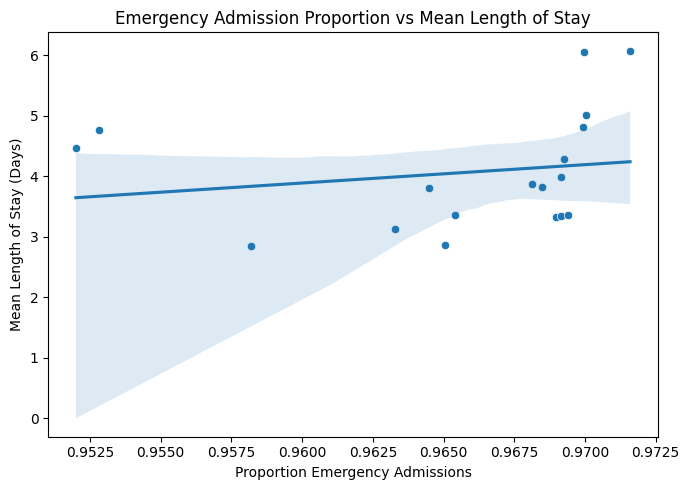

In [21]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df2, x="emergency_proportion", y="mean_los")

# Trend line for polish
sns.regplot(data=df2, x="emergency_proportion", y="mean_los", scatter=False)

plt.title("Emergency Admission Proportion vs Mean Length of Stay")
plt.xlabel("Proportion Emergency Admissions")
plt.ylabel("Mean Length of Stay (Days)")
plt.tight_layout()

plt.savefig("../outputs/figures/emergency_prop_vs_mean_los.png", dpi=300, bbox_inches="tight")
plt.show()


## Conclusion

This analysis used publicly available aggregate NHS Hospital Episode Statistics data to explore variation in hospital length of stay across ethnic categories and its relationship with admission type. The findings demonstrate that mean length of stay differs across ethnic groups and that higher proportions of emergency admissions are associated with longer average hospital stays at a population level.

The results highlight the importance of considering admission pathways and demographic composition when interpreting differences in hospital utilisation across ethnic categories. As the analysis was based on aggregated administrative data, the findings describe population-level patterns only and do not support causal or individual-level conclusions.

Overall, this project demonstrates how routinely collected healthcare data can be cleaned, analysed, and visualised using Python to generate meaningful descriptive insights. Future work using individual-level data and additional clinical or socioeconomic variables would be required to better understand the underlying factors contributing to observed differences in hospital length of stay.
